# Klasyfikatory złożone

# Zadanie 1

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("ensembles.txt", sep='\t')
df.head()

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat68,stat69,stat70,stat71,stat72,stat73,stat74,stat75,stat76,class
0,0.014586,0.59604,0.68085,0.65957,0.52070,0.54953,0.56784,0.56398,0.55124,0.49166,...,0.29450,0.82652,0.24611,0.48535,0.035907,0.586120,0.029229,0.20286,1.2244,1
1,0.014659,0.58867,0.67280,0.65477,0.51647,0.54661,0.56482,0.56016,0.55024,0.49027,...,0.30351,0.85490,0.24597,0.49558,0.042211,0.621670,0.028426,0.21693,1.1887,1
2,0.014937,0.57180,0.65477,0.64058,0.50351,0.53740,0.56018,0.55226,0.54304,0.48418,...,0.31521,0.89496,0.24546,0.51745,0.051145,0.680160,0.026267,0.23835,1.1411,1
3,0.015232,0.55410,0.63633,0.62817,0.49144,0.52709,0.55613,0.54340,0.53398,0.47832,...,0.32157,0.55918,0.24626,0.53640,0.055997,0.286820,0.025797,0.25366,1.1159,1
4,0.015367,0.54326,0.62562,0.62123,0.48406,0.52133,0.55343,0.53821,0.52881,0.47560,...,0.32343,0.35450,0.24731,0.54198,0.057434,0.091295,0.026116,0.25791,1.0927,1


In [3]:
df.describe()

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat68,stat69,stat70,stat71,stat72,stat73,stat74,stat75,stat76,class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.013954,0.355024,0.437803,0.405671,0.392544,0.403440,0.489532,0.492610,0.474111,0.477140,...,0.283543,0.311534,0.283997,0.338076,0.051307,0.082813,0.051865,0.096239,1.539304,0.956900
std,0.002686,0.180314,0.137209,0.129951,0.122911,0.116376,0.091624,0.088492,0.084144,0.086987,...,0.102810,0.195606,0.102678,0.139712,0.056886,0.123131,0.057882,0.122810,0.309850,0.203092
min,0.002017,0.045790,0.048038,0.069229,0.047150,0.042740,0.044226,0.037508,0.030355,0.032707,...,-0.074195,-0.150880,-0.060446,0.036154,-0.054096,-0.059679,-0.055134,-0.046299,0.345780,0.000000
25%,0.012795,0.218508,0.339855,0.310645,0.304350,0.321487,0.438667,0.444090,0.428905,0.429847,...,0.214230,0.201137,0.212500,0.254798,0.014041,-0.002511,0.014020,0.030148,1.371300,1.000000
50%,0.014276,0.299275,0.405210,0.378055,0.364315,0.383505,0.487335,0.491235,0.472745,0.474605,...,0.289575,0.326205,0.288375,0.322530,0.044452,0.056012,0.044019,0.066653,1.590100,1.000000
75%,0.015697,0.443217,0.515558,0.474867,0.461185,0.468103,0.540980,0.546588,0.518520,0.522340,...,0.348492,0.430180,0.348955,0.401560,0.075739,0.125645,0.076381,0.121210,1.758650,1.000000
max,0.020490,0.958410,0.923450,0.923050,0.931130,0.935420,0.968900,0.928220,0.925990,0.907240,...,0.761820,1.018100,0.709970,1.354000,0.504070,0.830710,0.433360,1.795600,2.142200,1.000000


In [13]:
len(df.columns)

126

In [4]:
df['class'].value_counts()

class
1    9569
0     431
Name: count, dtype: int64

In [5]:
df.isna().sum().sum()

0

In [6]:
df.dtypes.value_counts()

float64    125
int64        1
Name: count, dtype: int64

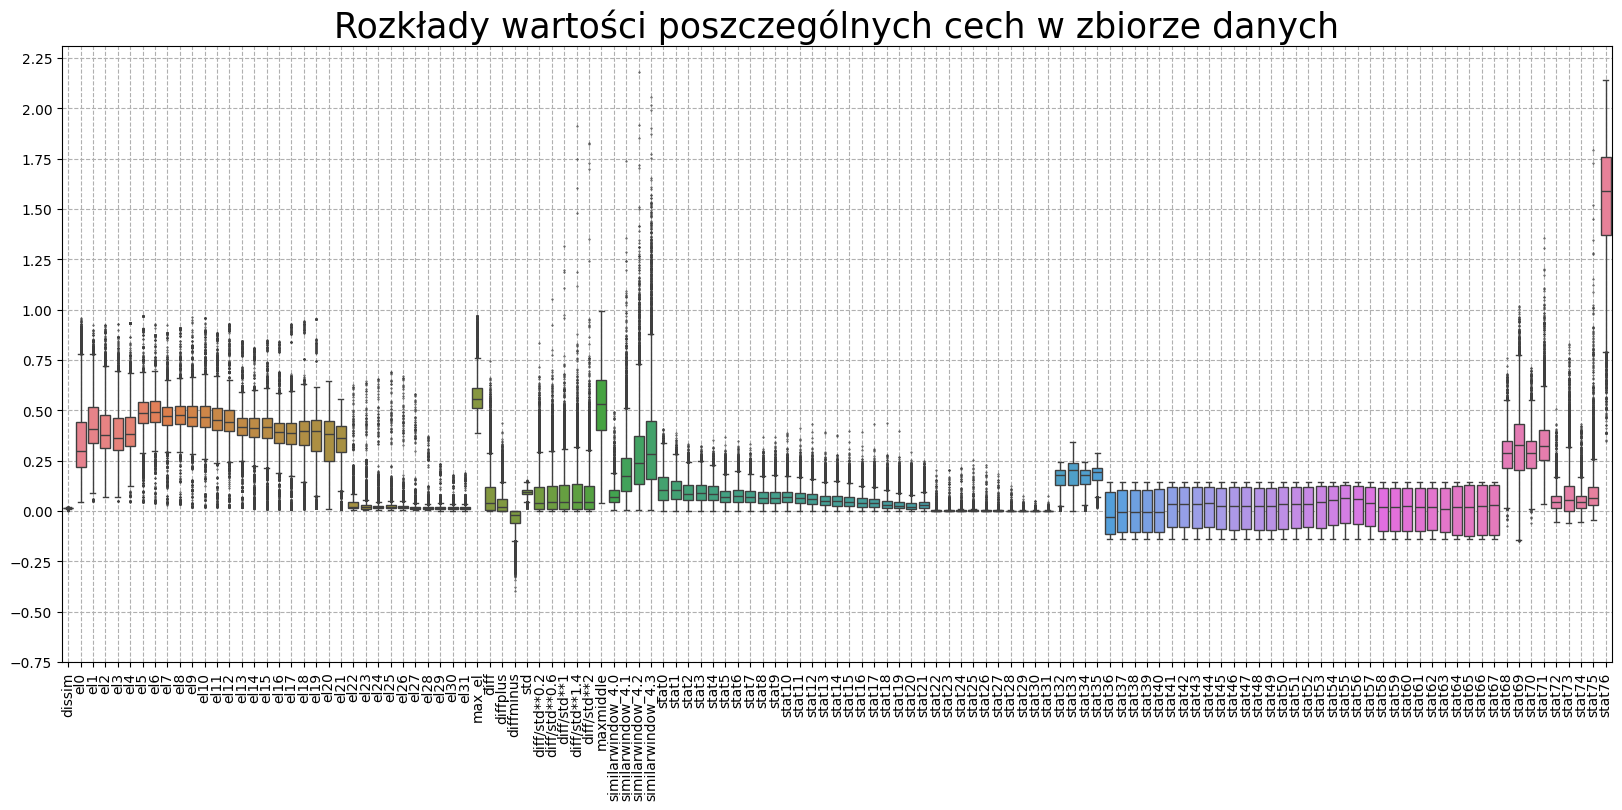

In [14]:
df_plot = df.drop(columns=['class'])
plt.figure(figsize=(20, 8))

p = sns.boxplot(data=df_plot, fliersize=0.5)
_ = p.set(yticks=np.arange(-0.75, 2.5, 0.25))

plt.xticks(rotation=90)
plt.title("Rozkłady wartości poszczególnych cech w zbiorze danych", fontsize=25)
plt.grid(linestyle='--')
plt.savefig("rozklad.png")
plt.show();

In [17]:
X = df.drop(columns=['class'])
y = df['class']

W zbiorze występuje 1000 próbek z czego każda posiada 126 atrybutów (ostatni to klasa decyzyjna). Wszystkie z cech to liczby rzeczywiste. W zbiorze nie ma wartości pustych. Zakresy poszczególnych wartości cech minimalnie różnią się między sobą - w zdecydowanej większości znajdują się w zakresie od 0 do 1 (z wartościami odstającymi dla similarwindow). Cechy można podzielić na parę grup:
- el0-el21 - wartości w większości w zakresie 0.25-0.5 z wartościami odstającymi od 0 do 1.
- el22-el31 - wartości bardzo bliskie 0.
- max_el - similar_window - wartości bardziej zróżnicowane niż poprzednie grupy, ale nadal pomiędzy 0 a 1 z wyjątkiem diffminus, która jest jedną z niewielu cech, która posiada wartości na minusie. similarwindow posiadają dużo wartości odstających. 
- stat0-stat35 - wartości od 0 do maksymalnie 0.5.
- stat36-stat67 - wyróżniający się blok cech o większym IQR od pozostałych, wszystkie z tych cech mają podobny rozkład i nie mają wartości odstających.
- stat68-stat76 - niektóre z cech dla tej grupy posiadają wartości mniejsze od 0 oraz większe od 1. Z tej grupy zdecydowanie wyróżnia się stat76, który ma wartości z zakresu od 0.5 do ponad 2.0.

W zbiorze znajduje się 9569 próbek z klasą 1, a 431 z klasą 0.

# Zadanie 2

[0.27067396 0.14776539]


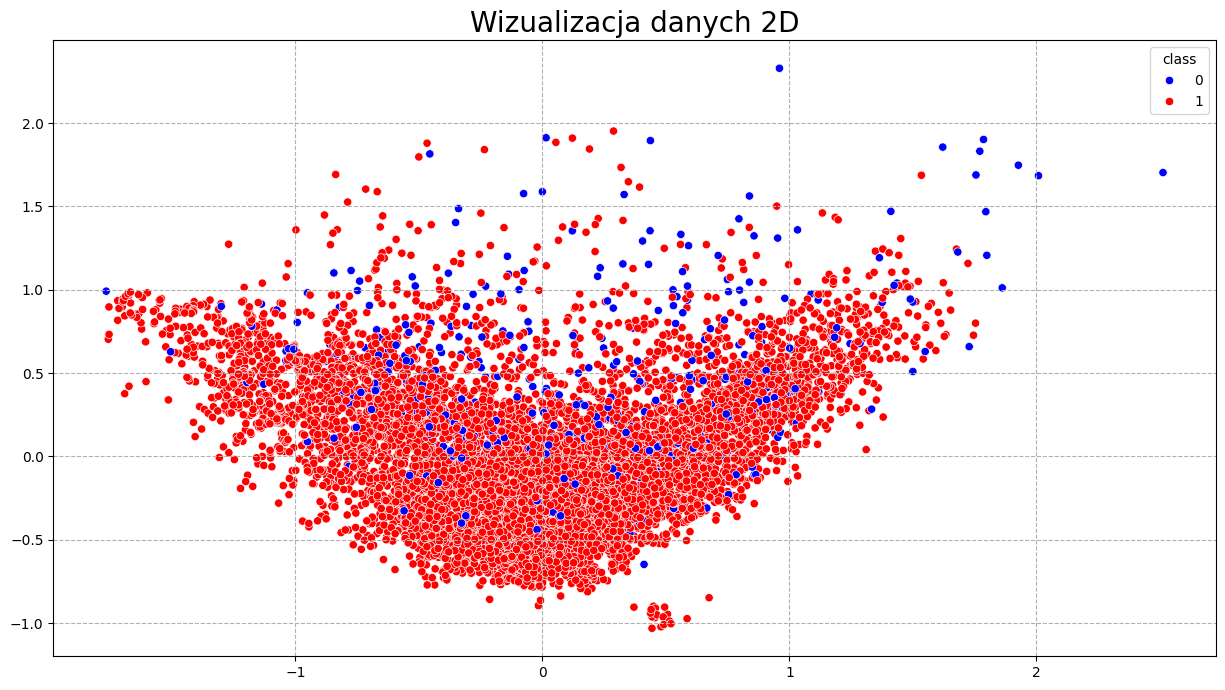

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
X_pca = pd.DataFrame(X_pca, columns=['x', 'y'])
X_pca['class'] = y

plt.figure(figsize=(15, 8))
sns.scatterplot(pd.DataFrame(X_pca), x='x', y='y', hue='class', hue_order=[0, 1], palette={0: 'blue', 1: 'red'})
plt.title("Wizualizacja danych 2D", fontsize=20)
plt.xlabel("")
plt.ylabel("")
# plt.rc('axes', axisbelow=True)
plt.grid(linestyle='--')
plt.savefig("visualization_2d.png")
plt.show();

In [31]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
X_pca = pd.DataFrame(X_pca, columns=['x', 'y', 'z'])
X_pca['class'] = y

fig = px.scatter_3d(X_pca, x='x', y='y', z='z', color='class')
fig.update_traces(marker=dict(size=2))
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

[0.27067396 0.14776539 0.08403319]


Na wykresie 2D widać overlapping, ale na pierwszej składowej mamy wyjaśnialność 0.27, a na drugiej 0.14, więc być może uda się zniwelować ten problem na oryginalnych wymiarach (dzięki temu, że będzie ich po prostu więcej).  Trudno powiedzieć na podstawie tych wykresów, które z klasyfikatorów poradzą sobie lepiej, a które gorzej, ponieważ istnieje spora część informacji, które zawarte są w oryginalnym zbiorze, a której nie widać na wizualizacji. Na wykresie 3D uzyskujemy odpowiednio 0.27, 0.14 i 0.08 wyjaśnialności.

# Zadanie 3